In [1]:
#pip install Tweepy
#pip install TextBlob

import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## Setting up Twiiter

In [2]:
config = pd.read_csv('Twitter_Keys.csv')

In [3]:

twitterBearerToken = config['Bearer_Token'][0]

client = tweepy.Client(bearer_token=twitterBearerToken, wait_on_rate_limit = True)

In [4]:
def twitter_tweets(president,start_date,end_date):
    query = '#{} lang:en -is:retweet'.format(president)

    # your start and end time for fetching tweets
    start_time = "{}T0:00:00Z".format(start_date)
    end_time = "{}T00:00:00Z".format(end_date)


    # Replace the limit=1000 with the maximum number of Tweets you want
    tweet_info_ = []

    for tweet in tweepy.Paginator(client.search_recent_tweets, query=query,
                                  start_time=start_time,
                                  end_time=end_time,
                                  tweet_fields = ["created_at", "text", "source", "public_metrics",
                                                  "in_reply_to_user_id"],
                                  #user_fields = ["name", "username", "location", "verified", "description"],
                                  max_results = 100).flatten(limit = 1000):

        tweet_info = {
                'id': tweet.id,
                'query': president,
                'created_at': tweet.created_at,
                'text': tweet.text,
                'source': tweet.source,
                'like_count' : tweet.public_metrics['like_count'],
                'retweet_count' : tweet.public_metrics['retweet_count'],
                'in_reply_to_user_id' : tweet.in_reply_to_user_id
        }
        tweet_info_.append(tweet_info)
    return(pd.DataFrame(tweet_info_))

In [5]:
#zelenskyy_mar18 = twitter_tweets('Zelenskyy','2022-03-18','2022-03-19')

In [69]:
merged_df_copy

,id,query,created_at,text,source,like_count,retweet_count,in_reply_to_user_id
0,1503521341181673475,Zelenskyy,2022-03-14 23:59:56+00:00,@Reuters #Tg5 ballistic missile launched today...,Twitter Web App,0,0,1652541.0
1,1503520945213956097,Zelenskyy,2022-03-14 23:58:22+00:00,“He will win who knows when to fight and when ...,Twitter for iPhone,2,0,NaN
2,1503520814842449920,Zelenskyy,2022-03-14 23:57:50+00:00,#Zelenskyy AND THIS #Russian #JOURNALIST ARE ...,Twitter for Android,1,1,NaN
3,1503520688367235075,Zelenskyy,2022-03-14 23:57:20+00:00,"Drawing the President of Ukriane, Volodymyr Ze...",Twitter for Android,5,4,NaN
4,1503520229367992322,Zelenskyy,2022-03-14 23:55:31+00:00,🇺🇦 #Ukraine #Zelenskyy #Democracy on the line\...,Twitter for iPad,0,0,NaN
...,...,...,...,...,...,...,...,...
995,1503420501321990152,Biden,2022-03-14 17:19:14+00:00,Learn the Truth about how #America started a C...,Twitter for iPhone,5,4,NaN
996,1503420444694790151,Biden,2022-03-14 17:19:00+00:00,😓 “But VoTe FoR BiDeN YaLL..BlUe WaVe 🌊”\n\n#U...,Twitter for iPhone,0,0,NaN
997,1503420282312159232,Biden,2022-03-14 17:18:22+00:00,The Azov Battalion is a right-wing neo-Nazi un...,Twitter Web App,0,0,NaN
998,1503420233159258114,Biden,2022-03-14 17:18:10+00:00,Shale CEO: The U.S can easily replace Russian ...,Twitter Web App,0,0,NaN


## Twitter Data - Preprocessing

In [107]:
tweets_df_zelenskyy = pd.DataFrame(zelenskyy_mar18)
tweets_df_putin = pd.DataFrame(putin_mar18)
tweets_df_biden = pd.DataFrame(biden_mar18)

merged_df = pd.concat([tweets_df_zelenskyy, tweets_df_putin])
merged_df_mar18 = pd.concat([merged_df, tweets_df_biden])


In [108]:
merged_df_copy = merged_df_mar18

In [109]:
merged_df_mar18

,id,query,created_at,text,source,like_count,retweet_count,in_reply_to_user_id
0,1504970906791256069,Zelenskyy,2022-03-18 23:59:59+00:00,Ukraine's far-right children's camp: 'I want t...,Twitter for iPad,1,0,NaN
1,1504970798649462786,Zelenskyy,2022-03-18 23:59:34+00:00,@thetimes Exactly as described above! The Russ...,Twitter Web App,1,0,6.107422e+06
2,1504970785668186115,Zelenskyy,2022-03-18 23:59:30+00:00,I’d like to officially congratulate #Zelenskyy...,Twitter for iPhone,2,1,NaN
3,1504970612929798144,Zelenskyy,2022-03-18 23:58:49+00:00,@GoldenA33430596 @POTUS @KremlinRussia_E @VP @...,Twitter for iPhone,0,0,1.480587e+18
4,1504970471934156801,Zelenskyy,2022-03-18 23:58:16+00:00,Spot On💥 @FTM_nl #biolabs #HunterBiden @wef #w...,TweetDeck,0,0,NaN
...,...,...,...,...,...,...,...,...
995,1504885362312859650,Biden,2022-03-18 18:20:04+00:00,"Red, White, and Blue stepchildren.\n#Biden #Bi...",Twitter for Android,1,0,NaN
996,1504885344793104384,Biden,2022-03-18 18:20:00+00:00,The #Biden administration came out with its ne...,TweetDeck,0,0,NaN
997,1504885329639190536,Biden,2022-03-18 18:19:56+00:00,@Jonatan_Nilsen7 @jeremyphilips8 It's embarras...,Twitter for Android,0,0,9.750291e+17
998,1504885132053909507,Biden,2022-03-18 18:19:09+00:00,Why is #Soros backing #Ukraine ? The #RussiaUk...,Twitter for iPhone,0,0,NaN


In [6]:
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+','',txt)
    txt = re.sub(r'#','',txt)
    txt = re.sub(r'RT : ','',txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]','',txt)
    txt = re.sub(r'[^a-zA-Z0-9 /$///.]',' ',txt)
    return txt

In [110]:
merged_df_copy['CleanText'] = merged_df_copy['text'].apply(cleanUpTweet)

In [111]:
merged_df_copy

,id,query,created_at,text,source,like_count,retweet_count,in_reply_to_user_id,CleanText
0,1504970906791256069,Zelenskyy,2022-03-18 23:59:59+00:00,Ukraine's far-right children's camp: 'I want t...,Twitter for iPad,1,0,NaN,Ukraine s far right children s camp I want t...
1,1504970798649462786,Zelenskyy,2022-03-18 23:59:34+00:00,@thetimes Exactly as described above! The Russ...,Twitter Web App,1,0,6.107422e+06,Exactly as described above The Russians park...
2,1504970785668186115,Zelenskyy,2022-03-18 23:59:30+00:00,I’d like to officially congratulate #Zelenskyy...,Twitter for iPhone,2,1,NaN,I d like to officially congratulate Zelenskyy ...
3,1504970612929798144,Zelenskyy,2022-03-18 23:58:49+00:00,@GoldenA33430596 @POTUS @KremlinRussia_E @VP @...,Twitter for iPhone,0,0,1.480587e+18,Lies lies misinformation Russian U...
4,1504970471934156801,Zelenskyy,2022-03-18 23:58:16+00:00,Spot On💥 @FTM_nl #biolabs #HunterBiden @wef #w...,TweetDeck,0,0,NaN,Spot On biolabs HunterBiden warmongers Zele...
...,...,...,...,...,...,...,...,...,...
995,1504885362312859650,Biden,2022-03-18 18:20:04+00:00,"Red, White, and Blue stepchildren.\n#Biden #Bi...",Twitter for Android,1,0,NaN,Red White and Blue stepchildren. Biden Biden...
996,1504885344793104384,Biden,2022-03-18 18:20:00+00:00,The #Biden administration came out with its ne...,TweetDeck,0,0,NaN,The Biden administration came out with its new...
997,1504885329639190536,Biden,2022-03-18 18:19:56+00:00,@Jonatan_Nilsen7 @jeremyphilips8 It's embarras...,Twitter for Android,0,0,9.750291e+17,It s embarrassing how misinformed so many Am...
998,1504885132053909507,Biden,2022-03-18 18:19:09+00:00,Why is #Soros backing #Ukraine ? The #RussiaUk...,Twitter for iPhone,0,0,NaN,Why is Soros backing Ukraine The RussiaUkrai...


## Twitter Sentiment Analysis

### FLAIR

In [58]:
#pip install flair

In [112]:
from flair.models import TextClassifier
from flair.data import Sentence

sia = TextClassifier.load('en-sentiment')

def flair_prediction(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "pos"
    elif "NEGATIVE" in str(score):
        return "neg"
    else:
        return "neu"
merged_df_copy['flair_sentiment'] = merged_df_copy['CleanText'].apply(flair_prediction)

#https://towardsdatascience.com/the-best-python-sentiment-analysis-package-1-huge-common-mistake-d6da9ad6cdeb

2022-03-20 00:59:13,629 loading file C:\Users\joelj\.flair\models\sentiment-en-mix-distillbert_4.pt


In [81]:
positive = merged_df_copy[merged_df_copy['flair_sentiment']=='pos']
print(str(positive.shape[0]/(merged_df_copy.shape[0])*100)+'% of Positive tweets')

24.933333333333334% of Positive tweets


In [64]:
negative = merged_df_copy[merged_df_copy['flair_sentiment']=='neg']
print(str(negative.shape[0]/(merged_df_copy.shape[0])*100)+'% of Negative tweets')

78.63333333333333% of Negative tweets


In [65]:
neutral = merged_df_copy[merged_df_copy['flair_sentiment']=='neu']
print(str(neutral.shape[0]/(merged_df_copy.shape[0])*100)+'% of Neutral tweets')

0.0% of Neutral tweets


### TEXT BLOB

In [55]:
#merged_df_copy.drop(columns=['Subjectivity','Polarity','Score'])
#merged_df_copy

In [113]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

def getTextAnalysis(a):
    if a<0:
        return 'Negative'
    elif a==0:
        return 'Neutral'
    else:
        return 'Positive'

merged_df_copy['Subjectivity'] = merged_df_copy['CleanText'].apply(getTextSubjectivity)
merged_df_copy['Polarity'] = merged_df_copy['CleanText'].apply(getTextPolarity)

merged_df_copy['Score'] = merged_df_copy['Polarity'].apply(getTextAnalysis)

In [68]:
positive = merged_df_copy[merged_df_copy['Score']=='Positive']
print(str(positive.shape[0]/(merged_df_copy.shape[0])*100)+'% of Positive tweets')

41.74166666666667% of Positive tweets


In [69]:
negative = merged_df_copy[merged_df_copy['Score']=='Negative']
print(str(negative.shape[0]/(merged_df_copy.shape[0])*100)+'% of Negative tweets')

25.074999999999996% of Negative tweets


In [70]:
neutral = merged_df_copy[merged_df_copy['Score']=='Neutral']
print(str(neutral.shape[0]/(merged_df_copy.shape[0])*100)+'% of Neutral tweets')

33.18333333333333% of Neutral tweets


### NLTK

In [114]:
from nltk.sentiment import SentimentIntensityAnalyzer
import operator

nlt_sia = SentimentIntensityAnalyzer()

merged_df_copy['NLTK_sentiment'] = merged_df_copy['CleanText'].apply(lambda x: nlt_sia.polarity_scores(x)["compound"])
merged_df_copy["NLTK_score"] = np.select([merged_df_copy["NLTK_sentiment"] < 0,
                                         merged_df_copy["NLTK_sentiment"] == 0,
                                         merged_df_copy["NLTK_sentiment"] > 0], ['neg', 'neu', 'pos'])

In [20]:
positive = merged_df_copy[merged_df_copy['NLTK_score']=='pos']
print(str(positive.shape[0]/(merged_df_copy.shape[0])*100)+'% of Positive tweets')

32.63333333333333% of Positive tweets


In [75]:
negative = merged_df_copy[merged_df_copy['NLTK_score']=='neg']
print(str(negative.shape[0]/(merged_df_copy.shape[0])*100)+'% of Negative tweets')

50.15833333333334% of Negative tweets


In [76]:
neutral = merged_df_copy[merged_df_copy['NLTK_score']=='neu']
print(str(neutral.shape[0]/(merged_df_copy.shape[0])*100)+'% of Neutral tweets')

17.541666666666668% of Neutral tweets


In [62]:
merged_df_copy

,id,query,created_at,text,source,like_count,retweet_count,in_reply_to_user_id,CleanText,flair_sentiment,Subjectivity,Polarity,Score,NLTK_sentiment,NLTK_score
0,1503158830905147397,Zelenskyy,2022-03-13 23:59:27+00:00,@DailyMirror He truly deserve it 👏 \n.\n.\n.\n...,Twitter for iPhone,0,0,1.688718e+07,He truly deserve it . . . Zelenskyy Ukrain...,pos,0.000000,0.0000,Neutral,0.4404,pos
1,1503158507742371842,Zelenskyy,2022-03-13 23:58:10+00:00,It must be galling for Putin to realise that t...,Twitter for Android,16,7,NaN,It must be galling for Putin to realise that t...,neg,0.479167,0.0375,Positive,-0.8481,neg
2,1503158407041515522,Zelenskyy,2022-03-13 23:57:46+00:00,@AFP more #Zelensky 🇺🇦PROPAGANDA🔫... he didnt ...,Twitter Web App,4,1,3.806486e+08,more Zelensky PROPAGANDA ... he didnt even ...,neg,0.300000,0.2000,Positive,0.2315,pos
3,1503158343325696001,Zelenskyy,2022-03-13 23:57:31+00:00,Yes.\n\n#Zelenskyy \n\nWe must #StandWithUkrai...,Twitter Web App,34,8,NaN,Yes. Zelenskyy We must StandWithUkraine A...,pos,0.675000,0.1875,Positive,0.7845,pos
4,1503157759113842692,Zelenskyy,2022-03-13 23:55:11+00:00,@Kateryna_Kruk now #Zelensky is marching #Ukra...,Twitter Web App,3,0,1.725293e+09,now Zelensky is marching Ukraine to the SLA...,neg,1.000000,-0.7500,Negative,-0.7925,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1503054744004169731,Biden,2022-03-13 17:05:51+00:00,@POTUS #Trump used the @USArmy @usairforce to ...,Twitter for iPhone,0,0,1.349149e+18,Trump used the to protect oil fields in Syr...,neg,0.206250,0.1000,Positive,0.8316,pos
996,1503054691487588354,Biden,2022-03-13 17:05:38+00:00,@GordonGChang @JCats2013 @77WABCradio Enlighte...,Twitter for iPhone,0,0,1.519304e+08,Enlighten your readers did America even try...,pos,0.000000,0.0000,Neutral,0.7964,pos
997,1503054656804696065,Biden,2022-03-13 17:05:30+00:00,Let’s do it too .#Biden in Uk Tories plan big ...,Twitter for iPhone,0,1,NaN,Let s do it too .Biden in Uk Tories plan big e...,pos,0.100000,0.0000,Neutral,0.6124,pos
998,1503054594296926210,Biden,2022-03-13 17:05:15+00:00,#Biden the #Jesuit &amp; the #Catholic Crack b...,Twitter Web App,0,0,NaN,Biden the Jesuit amp the Catholic Crack bein...,neg,0.100000,0.0000,Neutral,0.0000,neu


### CSV Operations

In [120]:
checking.to_csv('team_twitter_data.csv')

In [6]:
checking = pd.read_csv('final_data_twitter.csv')
checking = checking.drop(columns = ['Unnamed: 0'])
                                    #,'CleanText','Subjectivity','Polarity','Score','flair_sentiment',
                                    #'NLTK_sentiment','NLTK_score'])
checking

,id,query,created_at,text,source,like_count,retweet_count,in_reply_to_user_id,CleanText,Subjectivity,Polarity,Score,flair_sentiment,NLTK_sentiment,NLTK_score
0,1.500260e+18,Zelenskyy,2022-03-05 23:59:37+00:00,"@AndreeAnn_QC ""I'll be wearing a Marco Rubio m...",Twitter for Android,3,0,1.240000e+18,I ll be wearing a Marco Rubio mask so no one...,0.000000,0.000000,Neutral,neg,-0.4341,neg
1,1.500260e+18,Zelenskyy,2022-03-05 23:59:34+00:00,Watch the latest speech of the Ukrainian Presi...,Twitter Web App,0,0,NaN,Watch the latest speech of the Ukrainian Presi...,0.566667,0.300000,Positive,pos,0.5106,pos
2,1.500260e+18,Zelenskyy,2022-03-05 23:59:04+00:00,@afneil The Times: one of 3 attempts on #Zelen...,Twitter Web App,3,1,1.360050e+08,The Times one of 3 attempts on Zelenskyy s l...,0.187500,0.000000,Neutral,neg,-0.6908,neg
3,1.500260e+18,Zelenskyy,2022-03-05 23:56:48+00:00,pls.settle down😢\n\nRussia invades Ukraine LIV...,Twitter for iPhone,0,2,NaN,pls.settle down Russia invades Ukraine LIVE ...,0.394444,-0.009596,Negative,neg,0.0000,neu
4,1.500260e+18,Zelenskyy,2022-03-05 23:56:47+00:00,@marcorubio did it today by revealing #Zelensk...,Twitter for iPhone,0,0,1.574537e+07,did it today by revealing Zelenskyy s locati...,0.000000,0.000000,Neutral,neg,0.0000,neu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.504885e+18,Biden,2022-03-18 18:20:04+00:00,"Red, White, and Blue stepchildren.\n#Biden #Bi...",Twitter for Android,1,0,NaN,Red White and Blue stepchildren. Biden Biden...,0.033333,0.000000,Neutral,pos,0.0000,neu
41996,1.504885e+18,Biden,2022-03-18 18:20:00+00:00,The #Biden administration came out with its ne...,TweetDeck,0,0,NaN,The Biden administration came out with its new...,0.601515,0.103788,Positive,pos,0.2263,pos
41997,1.504885e+18,Biden,2022-03-18 18:19:56+00:00,@Jonatan_Nilsen7 @jeremyphilips8 It's embarras...,Twitter for Android,0,0,9.750291e+17,It s embarrassing how misinformed so many Am...,0.250000,0.250000,Positive,neg,-0.8658,neg
41998,1.504885e+18,Biden,2022-03-18 18:19:09+00:00,Why is #Soros backing #Ukraine ? The #RussiaUk...,Twitter for iPhone,0,0,NaN,Why is Soros backing Ukraine The RussiaUkrai...,0.200000,0.105556,Positive,neg,0.6705,pos


In [115]:
merged_df_42k = pd.concat([merged_df_39k, merged_df_copy])

In [116]:
merged_df_42k

,id,query,created_at,text,source,like_count,retweet_count,in_reply_to_user_id,CleanText,Subjectivity,Polarity,Score,flair_sentiment,NLTK_sentiment,NLTK_score
0,1.500260e+18,Zelenskyy,2022-03-05 23:59:37+00:00,"@AndreeAnn_QC ""I'll be wearing a Marco Rubio m...",Twitter for Android,3,0,1.240000e+18,I ll be wearing a Marco Rubio mask so no one...,0.000000,0.000000,Neutral,neg,-0.4341,neg
1,1.500260e+18,Zelenskyy,2022-03-05 23:59:34+00:00,Watch the latest speech of the Ukrainian Presi...,Twitter Web App,0,0,NaN,Watch the latest speech of the Ukrainian Presi...,0.566667,0.300000,Positive,pos,0.5106,pos
2,1.500260e+18,Zelenskyy,2022-03-05 23:59:04+00:00,@afneil The Times: one of 3 attempts on #Zelen...,Twitter Web App,3,1,1.360050e+08,The Times one of 3 attempts on Zelenskyy s l...,0.187500,0.000000,Neutral,neg,-0.6908,neg
3,1.500260e+18,Zelenskyy,2022-03-05 23:56:48+00:00,pls.settle down😢\n\nRussia invades Ukraine LIV...,Twitter for iPhone,0,2,NaN,pls.settle down Russia invades Ukraine LIVE ...,0.394444,-0.009596,Negative,neg,0.0000,neu
4,1.500260e+18,Zelenskyy,2022-03-05 23:56:47+00:00,@marcorubio did it today by revealing #Zelensk...,Twitter for iPhone,0,0,1.574537e+07,did it today by revealing Zelenskyy s locati...,0.000000,0.000000,Neutral,neg,0.0000,neu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.504885e+18,Biden,2022-03-18 18:20:04+00:00,"Red, White, and Blue stepchildren.\n#Biden #Bi...",Twitter for Android,1,0,NaN,Red White and Blue stepchildren. Biden Biden...,0.033333,0.000000,Neutral,pos,0.0000,neu
996,1.504885e+18,Biden,2022-03-18 18:20:00+00:00,The #Biden administration came out with its ne...,TweetDeck,0,0,NaN,The Biden administration came out with its new...,0.601515,0.103788,Positive,pos,0.2263,pos
997,1.504885e+18,Biden,2022-03-18 18:19:56+00:00,@Jonatan_Nilsen7 @jeremyphilips8 It's embarras...,Twitter for Android,0,0,9.750291e+17,It s embarrassing how misinformed so many Am...,0.250000,0.250000,Positive,neg,-0.8658,neg
998,1.504885e+18,Biden,2022-03-18 18:19:09+00:00,Why is #Soros backing #Ukraine ? The #RussiaUk...,Twitter for iPhone,0,0,NaN,Why is Soros backing Ukraine The RussiaUkrai...,0.200000,0.105556,Positive,neg,0.6705,pos


## Descriptive Analysis

In [88]:
Twitter_data_42k = pd.read_csv('final_data_twitter.csv')
Twitter_data_42k.shape

(42000, 16)

In [89]:
Twitter_data_42k = Twitter_data_42k.drop(columns = ['Unnamed: 0'])
Twitter_data_42k.head()

,id,query,created_at,text,source,like_count,retweet_count,in_reply_to_user_id,CleanText,Subjectivity,Polarity,Score,flair_sentiment,NLTK_sentiment,NLTK_score
0,1.500260e+18,Zelenskyy,2022-03-05 23:59:37+00:00,"@AndreeAnn_QC ""I'll be wearing a Marco Rubio m...",Twitter for Android,3,0,1.240000e+18,I ll be wearing a Marco Rubio mask so no one...,0.000000,0.000000,Neutral,neg,-0.4341,neg
1,1.500260e+18,Zelenskyy,2022-03-05 23:59:34+00:00,Watch the latest speech of the Ukrainian Presi...,Twitter Web App,0,0,NaN,Watch the latest speech of the Ukrainian Presi...,0.566667,0.300000,Positive,pos,0.5106,pos
2,1.500260e+18,Zelenskyy,2022-03-05 23:59:04+00:00,@afneil The Times: one of 3 attempts on #Zelen...,Twitter Web App,3,1,1.360050e+08,The Times one of 3 attempts on Zelenskyy s l...,0.187500,0.000000,Neutral,neg,-0.6908,neg
3,1.500260e+18,Zelenskyy,2022-03-05 23:56:48+00:00,pls.settle down😢\n\nRussia invades Ukraine LIV...,Twitter for iPhone,0,2,NaN,pls.settle down Russia invades Ukraine LIVE ...,0.394444,-0.009596,Negative,neg,0.0000,neu
4,1.500260e+18,Zelenskyy,2022-03-05 23:56:47+00:00,@marcorubio did it today by revealing #Zelensk...,Twitter for iPhone,0,0,1.574537e+07,did it today by revealing Zelenskyy s locati...,0.000000,0.000000,Neutral,neg,0.0000,neu


In [90]:
Twitter_data_42k.dtypes

id                     float64
query                   object
created_at              object
text                    object
source                  object
like_count               int64
retweet_count            int64
in_reply_to_user_id    float64
CleanText               object
Subjectivity           float64
Polarity               float64
Score                   object
flair_sentiment         object
NLTK_sentiment         float64
NLTK_score              object
dtype: object

In [91]:
Twitter_data_42k['created_at'] = pd.to_datetime(Twitter_data_42k['created_at'])

In [94]:
Twitter_data_42k.dtypes

id                                 float64
query                               object
created_at             datetime64[ns, UTC]
text                                object
source                              object
like_count                           int64
retweet_count                        int64
in_reply_to_user_id                float64
CleanText                           object
Subjectivity                       float64
Polarity                           float64
Score                               object
flair_sentiment                     object
NLTK_sentiment                     float64
NLTK_score                          object
dtype: object

In [99]:
Twitter_data_42k['day'] = Twitter_data_42k.created_at.dt.day

In [100]:
Twitter_data_42k.head()

,id,query,created_at,text,source,like_count,retweet_count,in_reply_to_user_id,CleanText,Subjectivity,Polarity,Score,flair_sentiment,NLTK_sentiment,NLTK_score,day
0,1.500260e+18,Zelenskyy,2022-03-05 23:59:37+00:00,"@AndreeAnn_QC ""I'll be wearing a Marco Rubio m...",Twitter for Android,3,0,1.240000e+18,I ll be wearing a Marco Rubio mask so no one...,0.000000,0.000000,Neutral,neg,-0.4341,neg,5
1,1.500260e+18,Zelenskyy,2022-03-05 23:59:34+00:00,Watch the latest speech of the Ukrainian Presi...,Twitter Web App,0,0,NaN,Watch the latest speech of the Ukrainian Presi...,0.566667,0.300000,Positive,pos,0.5106,pos,5
2,1.500260e+18,Zelenskyy,2022-03-05 23:59:04+00:00,@afneil The Times: one of 3 attempts on #Zelen...,Twitter Web App,3,1,1.360050e+08,The Times one of 3 attempts on Zelenskyy s l...,0.187500,0.000000,Neutral,neg,-0.6908,neg,5
3,1.500260e+18,Zelenskyy,2022-03-05 23:56:48+00:00,pls.settle down😢\n\nRussia invades Ukraine LIV...,Twitter for iPhone,0,2,NaN,pls.settle down Russia invades Ukraine LIVE ...,0.394444,-0.009596,Negative,neg,0.0000,neu,5
4,1.500260e+18,Zelenskyy,2022-03-05 23:56:47+00:00,@marcorubio did it today by revealing #Zelensk...,Twitter for iPhone,0,0,1.574537e+07,did it today by revealing Zelenskyy s locati...,0.000000,0.000000,Neutral,neg,0.0000,neu,5


##### Biden Tweets

In [101]:
#Biden Data

Biden_tweets = Twitter_data_42k[Twitter_data_42k['query'] == 'Biden']
Biden_tweets.shape

(14000, 16)

In [102]:
Biden_tweets.head()

,id,query,created_at,text,source,like_count,retweet_count,in_reply_to_user_id,CleanText,Subjectivity,Polarity,Score,flair_sentiment,NLTK_sentiment,NLTK_score,day
2000,1.500260e+18,Biden,2022-03-05 23:59:59+00:00,Meanwhile… \n\n#Biden thinks #Putin has invade...,Twitter for iPhone,0,0,NaN,Meanwhile Biden thinks Putin has invaded Ru...,0.0,0.000,Neutral,neg,0.0000,neu,5
2001,1.500260e+18,Biden,2022-03-05 23:59:28+00:00,#Biden is compromised and #Putin holds the car...,Twitter for iPhone,0,0,NaN,Biden is compromised and Putin holds the cards...,0.0,0.000,Neutral,neg,0.0000,neu,5
2002,1.500260e+18,Biden,2022-03-05 23:59:11+00:00,"@Reuters .@Reuters The West, #Merkel, #Biden -...",Twitter Web App,0,0,1652541.0,. The West Merkel Biden they allowed Puti...,0.0,0.000,Neutral,neg,0.1531,pos,5
2003,1.500260e+18,Biden,2022-03-05 23:58:21+00:00,#IStandWithBiden #DemsWork4USA #VoteBlue2022 \...,Twitter Web App,0,0,NaN,IStandWithBiden DemsWork4USA VoteBlue2022 Bi...,0.0,0.000,Neutral,pos,0.0000,neu,5
2004,1.500260e+18,Biden,2022-03-05 23:58:17+00:00,Here's the Problem. You Can't #Denazify a Nazi...,Twitter Web App,1,1,NaN,Here s the Problem. You Can t Denazify a Nazi....,0.5,0.125,Positive,neg,-0.6249,neg,5


##### Putin Tweets

In [103]:
# Putin Tweets

Putin_tweets = Twitter_data_42k[Twitter_data_42k['query'] == 'Putin']
Putin_tweets.shape

(14000, 16)

In [104]:
Putin_tweets.head()

,id,query,created_at,text,source,like_count,retweet_count,in_reply_to_user_id,CleanText,Subjectivity,Polarity,Score,flair_sentiment,NLTK_sentiment,NLTK_score,day
1000,1.500260e+18,Putin,2022-03-05 23:59:59+00:00,Meanwhile… \n\n#Biden thinks #Putin has invade...,Twitter for iPhone,0,0,NaN,Meanwhile Biden thinks Putin has invaded Ru...,0.00,0.00,Neutral,neg,0.0000,neu,5
1001,1.500260e+18,Putin,2022-03-05 23:59:58+00:00,@NitoCortizo #Ukraine needs weapons and humani...,Twitter Web App,0,0,3.890841e+08,Ukraine needs weapons and humanitarian assist...,0.35,0.25,Positive,neg,-0.6249,neg,5
1002,1.500260e+18,Putin,2022-03-05 23:59:58+00:00,@EUvsDisinfo #Ukraine needs weapons and humani...,Twitter Web App,0,0,4.105478e+09,Ukraine needs weapons and humanitarian assist...,0.35,0.25,Positive,neg,-0.6249,neg,5
1003,1.500260e+18,Putin,2022-03-05 23:59:56+00:00,"@Reuters .@Reuters Merkel ""mummies"" Putin. I i...",Twitter Web App,0,0,1.652541e+06,. Merkel mummies Putin. I invite to my blog...,0.00,0.00,Neutral,neg,0.1531,pos,5
1004,1.500260e+18,Putin,2022-03-05 23:59:56+00:00,@DZalkaliani @BakradzeDavid @SenatorCardin #Uk...,Twitter Web App,0,0,9.850000e+17,Ukraine needs weapons and humanitarian assi...,0.35,0.25,Positive,neg,-0.6249,neg,5


##### Zelenkskyy Tweets

In [105]:
#Zelenkskyy Tweets

Zelensky_tweets = Twitter_data_42k[Twitter_data_42k['query'] == 'Zelenskyy']
Zelensky_tweets.shape

(14000, 16)

In [106]:
Zelensky_tweets.head()

,id,query,created_at,text,source,like_count,retweet_count,in_reply_to_user_id,CleanText,Subjectivity,Polarity,Score,flair_sentiment,NLTK_sentiment,NLTK_score,day
0,1.500260e+18,Zelenskyy,2022-03-05 23:59:37+00:00,"@AndreeAnn_QC ""I'll be wearing a Marco Rubio m...",Twitter for Android,3,0,1.240000e+18,I ll be wearing a Marco Rubio mask so no one...,0.000000,0.000000,Neutral,neg,-0.4341,neg,5
1,1.500260e+18,Zelenskyy,2022-03-05 23:59:34+00:00,Watch the latest speech of the Ukrainian Presi...,Twitter Web App,0,0,NaN,Watch the latest speech of the Ukrainian Presi...,0.566667,0.300000,Positive,pos,0.5106,pos,5
2,1.500260e+18,Zelenskyy,2022-03-05 23:59:04+00:00,@afneil The Times: one of 3 attempts on #Zelen...,Twitter Web App,3,1,1.360050e+08,The Times one of 3 attempts on Zelenskyy s l...,0.187500,0.000000,Neutral,neg,-0.6908,neg,5
3,1.500260e+18,Zelenskyy,2022-03-05 23:56:48+00:00,pls.settle down😢\n\nRussia invades Ukraine LIV...,Twitter for iPhone,0,2,NaN,pls.settle down Russia invades Ukraine LIVE ...,0.394444,-0.009596,Negative,neg,0.0000,neu,5
4,1.500260e+18,Zelenskyy,2022-03-05 23:56:47+00:00,@marcorubio did it today by revealing #Zelensk...,Twitter for iPhone,0,0,1.574537e+07,did it today by revealing Zelenskyy s locati...,0.000000,0.000000,Neutral,neg,0.0000,neu,5


#### Polarity vs Subjectivity - TextBlob Analysis

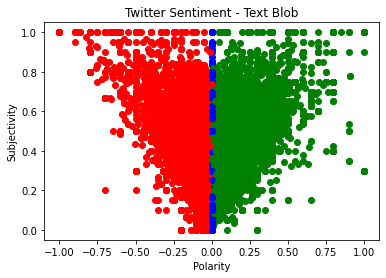

In [29]:
#Biden sentiment analysis through TextBlob

for index,row in Biden_tweets.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color = 'green')
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color = 'red')
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'],row['Subjectivity'],color = 'blue')

plt.title('Biden Sentiment - Text Blob')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

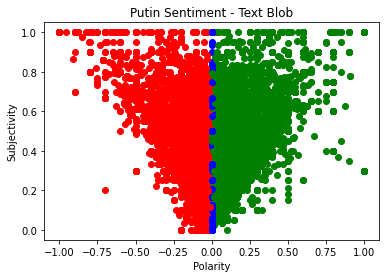

In [39]:
#Putin sentiment analysis through TextBlob

for index,row in Putin_tweets.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color = 'green')
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color = 'red')
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'],row['Subjectivity'],color = 'blue')

plt.title('Putin Sentiment - Text Blob')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

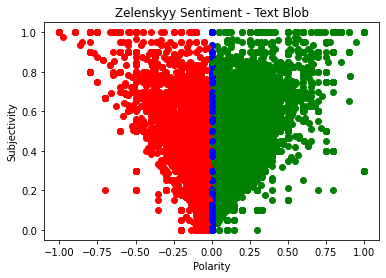

In [41]:
#Zelenskyy sentiment analysis through TextBlob

for index,row in Zelensky_tweets.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color = 'green')
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color = 'red')
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'],row['Subjectivity'],color = 'blue')

plt.title('Zelenskyy Sentiment - Text Blob')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

#### Sources Analysis

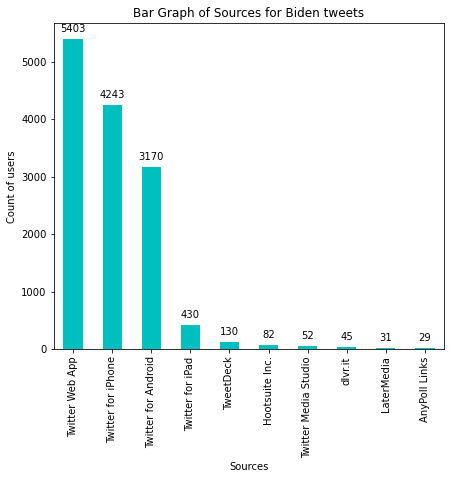

In [69]:
#Biden tweets

sources_biden = Biden_tweets['source'].value_counts()
top10_biden = sources_biden.iloc[0:10]

plt.figure(figsize=(7, 6))
ax = top10_biden.plot(kind='bar', color="c")
ax.set_title("Bar Graph of Sources for Biden tweets", y = 1)
ax.set_xlabel('Sources')
ax.set_ylabel('Count of users')

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

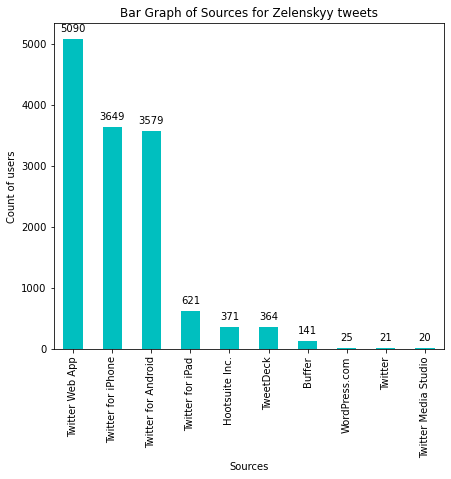

In [66]:
#Zelenskyy tweets

sources_zelenskyy = Zelensky_tweets['source'].value_counts()
top10_zelenskyy = sources_zelenskyy.iloc[0:10]

plt.figure(figsize=(7, 6))
ax = top10_zelenskyy.plot(kind='bar', color="c")
ax.set_title("Bar Graph of Sources for Zelenskyy tweets", y = 1)
ax.set_xlabel('Sources')
ax.set_ylabel('Count of users')

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

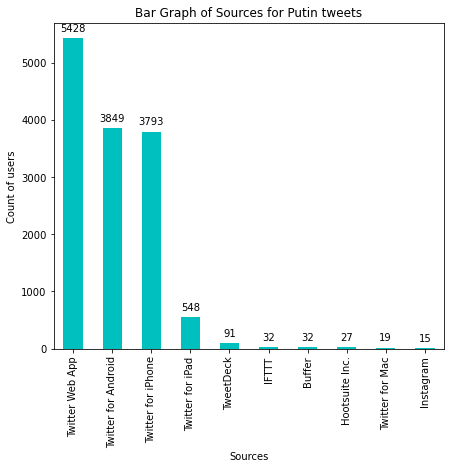

In [65]:
#putin tweets

sources_putin = Putin_tweets['source'].value_counts()
top10_putin = sources_putin.iloc[0:10]

plt.figure(figsize=(7, 6))
ax = top10_putin.plot(kind='bar', color="c")
ax.set_title("Bar Graph of Sources for Putin tweets", y = 1)
ax.set_xlabel('Sources')
ax.set_ylabel('Count of users')

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

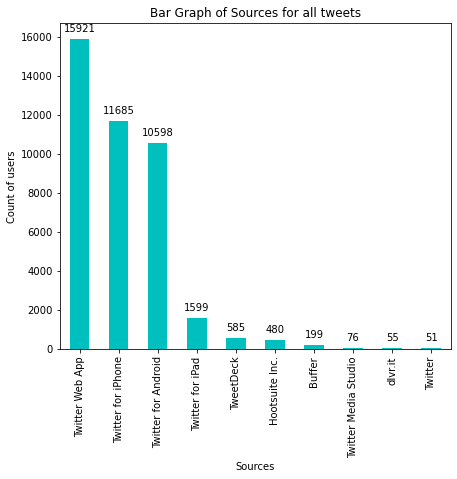

In [68]:
#Overall tweets source

sources_all = Twitter_data_42k['source'].value_counts()
top10_all = sources_all.iloc[0:10]

plt.figure(figsize=(7, 6))
ax = top10_all.plot(kind='bar', color="c")
ax.set_title("Bar Graph of Sources for all tweets", y = 1)
ax.set_xlabel('Sources')
ax.set_ylabel('Count of users')

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

#### Positive/Negative tweets

##### Flair

array([<AxesSubplot:ylabel='flair_sentiment'>], dtype=object)

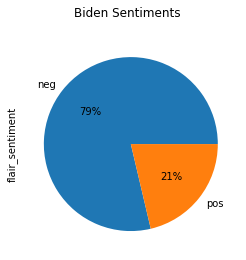

In [83]:
#Biden positive/negative

posneg_biden = Biden_tweets['flair_sentiment'].value_counts()

posneg_biden.plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(4, 4), title='Biden Sentiments')

array([<AxesSubplot:ylabel='flair_sentiment'>], dtype=object)

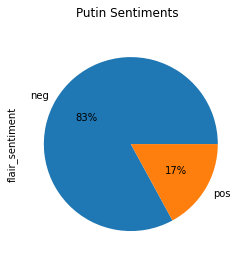

In [81]:
#Biden positive/negative

posneg_putin = Putin_tweets['flair_sentiment'].value_counts()

posneg_putin.plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(4, 4), title='Putin Sentiments')

array([<AxesSubplot:ylabel='flair_sentiment'>], dtype=object)

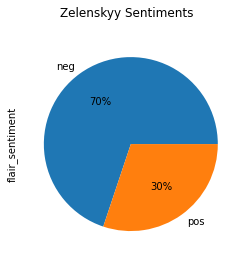

In [82]:
#Zelenskyy positive/negative

posneg_zelensky = Zelensky_tweets['flair_sentiment'].value_counts()

posneg_zelensky.plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(4, 4), title='Zelenskyy Sentiments')

##### NLTK

array([<AxesSubplot:ylabel='NLTK_score'>], dtype=object)

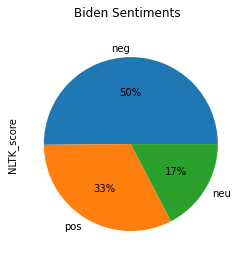

In [84]:
#Biden positive/negative

posneg_biden = Biden_tweets['NLTK_score'].value_counts()

posneg_biden.plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(4, 4), title='Biden Sentiments')

array([<AxesSubplot:ylabel='NLTK_score'>], dtype=object)

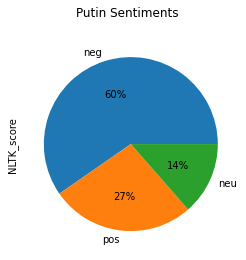

In [86]:
#Biden positive/negative

posneg_putin = Putin_tweets['NLTK_score'].value_counts()

posneg_putin.plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(4, 4), title='Putin Sentiments')

array([<AxesSubplot:ylabel='NLTK_score'>], dtype=object)

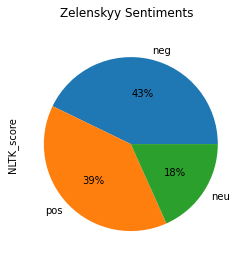

In [85]:
#Zelenskyy positive/negative

posneg_zelensky = Zelensky_tweets['NLTK_score'].value_counts()

posneg_zelensky.plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(4, 4), title='Zelenskyy Sentiments')

#### Sentiments by day

Text(0.5, 1.0, 'Sentiments on Zelenskyy over 5th March to 18th March by day')

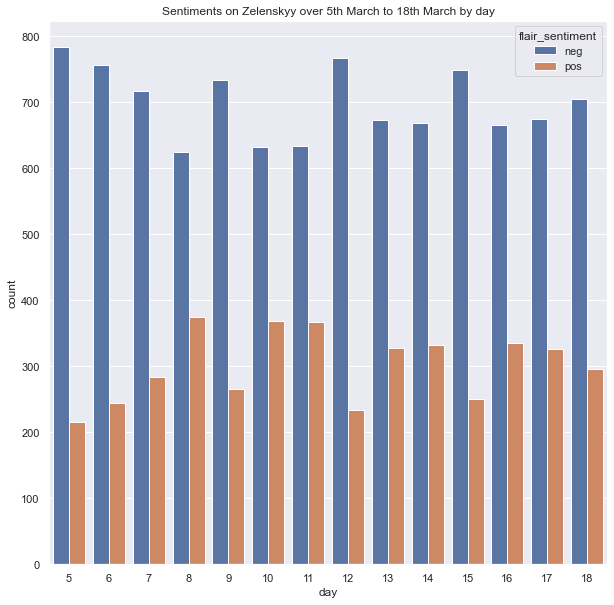

In [129]:
import seaborn as sns

sns.countplot(x = 'day', hue = 'flair_sentiment', data = Zelensky_tweets)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Sentiments on Zelenskyy over 5th March to 18th March by day")

Text(0.5, 1.0, 'Sentiments on Putin over 5th March to 18th March by day')

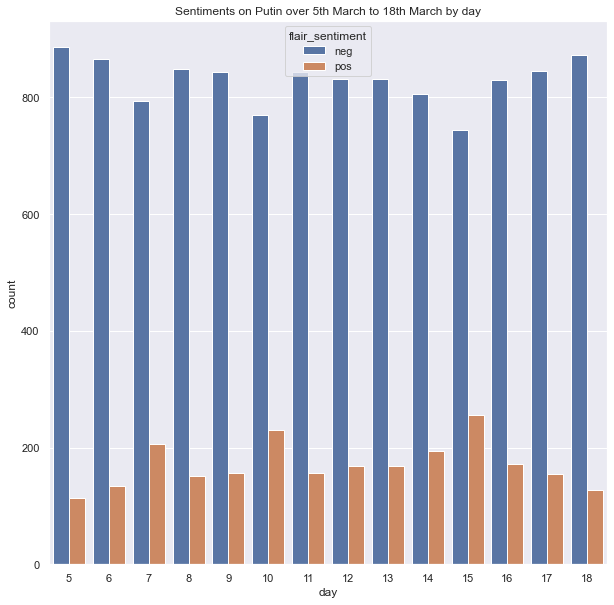

In [127]:
sns.countplot(x = 'day', hue = 'flair_sentiment', data = Putin_tweets)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Sentiments on Putin over 5th March to 18th March by day")

Text(0.5, 1.0, 'Sentiments on Biden over 5th March to 18th March by day')

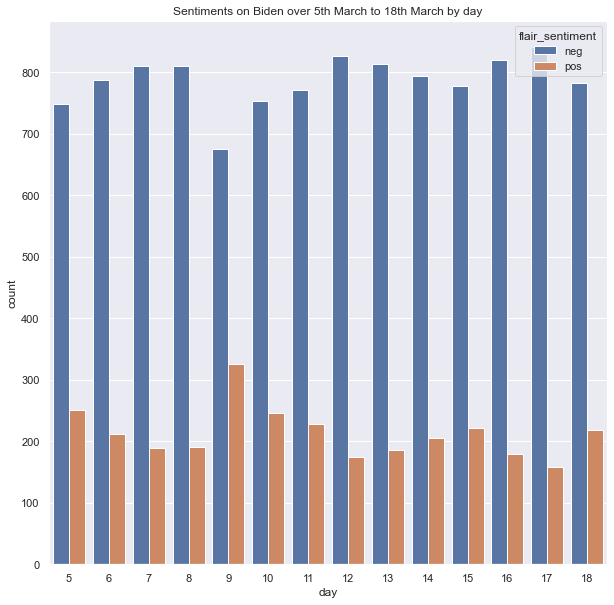

In [128]:
sns.countplot(x = 'day', hue = 'flair_sentiment', data = Biden_tweets)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Sentiments on Biden over 5th March to 18th March by day")

#### WordCloud

In [130]:
#pip install nltk
#import nltk
#nltk.download(["names",
#               "stopwords",
#               "state_union",
#               "twitter_samples",
               #"movie_reviews",
#               "averaged_perceptron_tagger",
#               "vader_lexicon", "punkt",
# ])

In [30]:
#pip install nltk
##pip install wordcloud-1.8.1-cp39-cp39-win_amd64.whl

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

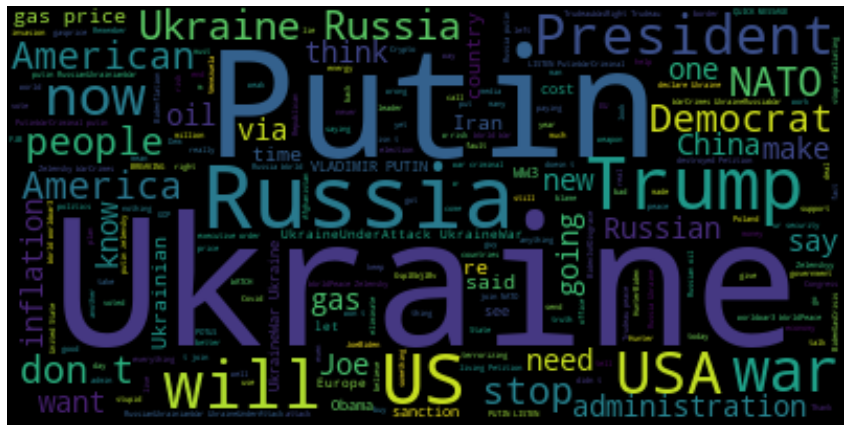

In [32]:
stopwords = nltk.corpus.stopwords.words("english")

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","Biden","CO","S", "U","ga","amp","re"])
textt = " ".join(review for review in Biden_tweets['CleanText'])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

plt.subplots(1, 1, figsize=(15, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('wordcloud11.png')
plt.show()

#https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud

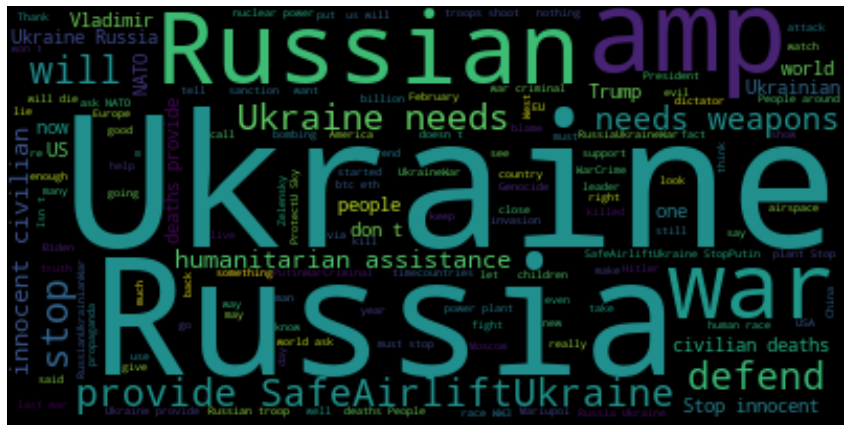

In [38]:
stopwords = nltk.corpus.stopwords.words("english")

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","Putin","CO","S","U"])
textt = " ".join(review for review in Putin_tweets['CleanText'])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

plt.subplots(1, 1, figsize=(15, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('wordcloud11.png')
plt.show()

#https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud

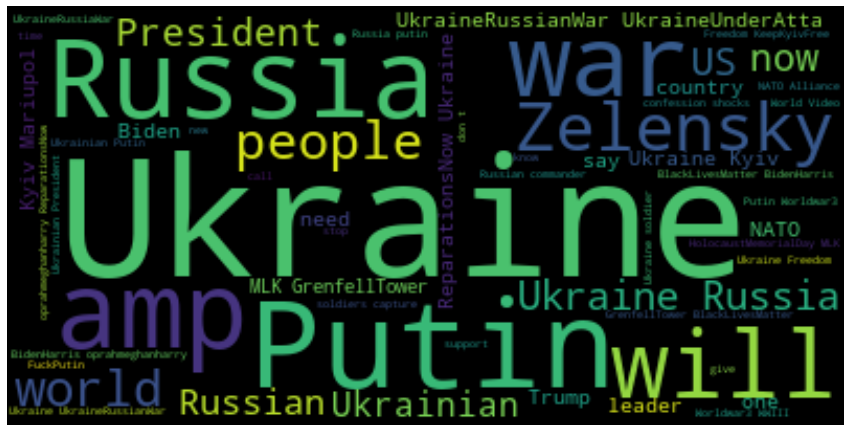

In [36]:
stopwords = nltk.corpus.stopwords.words("english")

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","Zelenskyy","CO","U","S","amp"])
textt = " ".join(review for review in Zelensky_tweets['CleanText'])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

plt.subplots(1, 1, figsize=(15, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('wordcloud11.png')
plt.show()

#https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud

# Predictive Analysis

In [134]:
Twitter_data_42k['flair_sentiment'] = Twitter_data_42k['flair_sentiment'].map({'pos': 1, 'neg': 0})
Twitter_data_42k.head()

,id,query,created_at,text,source,like_count,retweet_count,in_reply_to_user_id,CleanText,Subjectivity,Polarity,Score,flair_sentiment,NLTK_sentiment,NLTK_score,day
0,1.500260e+18,Zelenskyy,2022-03-05 23:59:37+00:00,"@AndreeAnn_QC ""I'll be wearing a Marco Rubio m...",Twitter for Android,3,0,1.240000e+18,I ll be wearing a Marco Rubio mask so no one...,0.000000,0.000000,Neutral,0,-0.4341,neg,5
1,1.500260e+18,Zelenskyy,2022-03-05 23:59:34+00:00,Watch the latest speech of the Ukrainian Presi...,Twitter Web App,0,0,NaN,Watch the latest speech of the Ukrainian Presi...,0.566667,0.300000,Positive,1,0.5106,pos,5
2,1.500260e+18,Zelenskyy,2022-03-05 23:59:04+00:00,@afneil The Times: one of 3 attempts on #Zelen...,Twitter Web App,3,1,1.360050e+08,The Times one of 3 attempts on Zelenskyy s l...,0.187500,0.000000,Neutral,0,-0.6908,neg,5
3,1.500260e+18,Zelenskyy,2022-03-05 23:56:48+00:00,pls.settle down😢\n\nRussia invades Ukraine LIV...,Twitter for iPhone,0,2,NaN,pls.settle down Russia invades Ukraine LIVE ...,0.394444,-0.009596,Negative,0,0.0000,neu,5
4,1.500260e+18,Zelenskyy,2022-03-05 23:56:47+00:00,@marcorubio did it today by revealing #Zelensk...,Twitter for iPhone,0,0,1.574537e+07,did it today by revealing Zelenskyy s locati...,0.000000,0.000000,Neutral,0,0.0000,neu,5


In [137]:
X = Twitter_data_42k['CleanText']
y = Twitter_data_42k['flair_sentiment']

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify = y)


In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

#https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/

No. of feature_words:  365468


In [142]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [154]:
from sklearn.naive_bayes import BernoulliNB

BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
y_pred1 = BNBmodel.predict(X_test)

In [155]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred1, normalize = True) * 100 

80.71428571428572

In [156]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred1))

Confusion Matrix
[[6423   59]
 [1561  357]]


In [152]:
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression(random_state = 0)
LRmodel.fit(X_train, y_train)
y_pred2 = LRmodel.predict(X_test)

In [153]:
accuracy_score(y_test,y_pred2, normalize = True) * 100 

83.86904761904762

In [157]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred2))

Confusion Matrix
[[6380  102]
 [1253  665]]
